## FaceNet


Import section


In [1]:
import cv2 as cv
import os 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import MySQLdb
import numpy as np
import base64

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Testing the connection to database

In [3]:
# Load up the .env file
try:
    if (load_dotenv()):
        print("Loaded .env variables")
    else:
        print("Error in loading variables or file not found!")

except Exception:
    print("Error in loading .env file")
## Connect to database
host = os.environ.get("DB_HOST")
user = os.environ.get("DB_USER")
pw = os.environ.get("DB_PASS")
db_name = os.environ.get("DB_SCHEMA")
try:
    connection = MySQLdb.connect(host, user, pw, db_name)
    print("Successfully connected to ", db_name)
    connection.close()
except Exception:
    print("Error connecting!")

Loaded .env variables
Successfully connected to  heroku_9ee0e413f16e154


Creating the database instance

In [4]:
# Create an instance for the db and cursor
def getDBCursor():
    db = MySQLdb.connect(host, user, pw, db_name)
    cursor = db.cursor()
    return cursor

In [5]:
''' This code can create sub-directories based on tenant_name '''
# # Define a global variable to store all IMG bytearray and data
# face_capture = []
# face_img = []

# # Face Entity and all Facts from the table 
# face_id = []
# tenant_id = []
# tenant_name = []
# face_status = []


# def fetch_all_FaceCaptures():
#     '''
#         Begin making queries to the database and SELECT our FACE_IMG table
#         where all facial captures are stored
#     '''
#     # Create a query to select all facial captures
#     sql_fetch_faceCaptures = "SELECT * FROM FACE_IMG"
#     cursor = getDBCursor()
#     cursor.execute(sql_fetch_faceCaptures)
#     # Fetch all data as rows
#     rows = cursor.fetchall()

#     # Iterate and assign data as to row
#     for row in rows:
#         face_id = row[0]
#         tenant_id = row[1]
#         tenant_name = row[2]
#         face_status = row[3]
#         face_capture = row[4]
#         # Convert the face_capture column to a bytes-like object
#         face_capture_bytes = bytearray(face_capture)
#         # Use the cv.imdecode() function to decode the bytes-like object into an image
#         face_img = cv.imdecode(np.frombuffer(face_capture_bytes, np.uint8), cv.IMREAD_COLOR)

#         # Display some attribute data 
#         print("==============================================================")
#         print("Face ID: ", face_id)
#         print("Tenant ID: ", tenant_id)
#         print("Tenant Full Name: ", tenant_name)
#         print("Status: ", face_status)
#         print("Face IMG data: ", face_img)
#         print(" ---> Type: ", type(face_img))
#         print("==============================================================")

#         # Render the image 
#         try:
#             # Convert image to PNG format and store it in a variable
#             try: 
#                 # encoded_img = cv.imencode(".png", face_img)
#                 # print("Converting image to .png")
#                 # face_img_png = encoded_img.tobytes()
#                 # with open(f'out/{tenant_name}.png', 'wb') as f:
#                 #     # Decode the base64-encoded PNG data
#                 #     decoded_data = base64.b64decode(face_img_png)
#                 #     print(f"Saved PNG file: out/{tenant_name}.png")
#                 #     # Write the decoded data to the file stream
#                 #     f.write(decoded_data)
#                 # Convert image to PNG format and store it in a variable
#                 if os.path.exists('../out/train/images'):
#                     # Replace spaces with underscores in tenant name
#                     tenant_dir = tenant_name.replace(" ", "_")
#                     # Create sub-directory path
#                     sub_dir = os.path.join('out/train/images', tenant_dir)
#                     if not os.path.exists(sub_dir):
#                         os.makedirs(sub_dir)
#                     cv.imwrite(os.path.join(sub_dir, f'{tenant_name}.png'), face_img)
#                     print(f"Images downloaded to {sub_dir}/{tenant_name}.png")
#                 else: 
#                     print("Directory is not existing")
#                     print("Making directory....")
#                     os.makedirs('out/train/images')
#                     # Replace spaces with underscores in tenant name
#                     tenant_dir = tenant_name.replace(" ", "_")
#                     # Create sub-directory path
#                     sub_dir = os.path.join('out/train/images', tenant_dir)
#                     if not os.path.exists(sub_dir):
#                         os.makedirs(sub_dir)
#                     cv.imwrite(os.path.join(sub_dir, f'{tenant_name}.png'), face_img)
#                     print(f"Images downloaded to {sub_dir}/{tenant_name}.png")
#             except:
#                 print("An error has occurred converting the image")
#         except: 
#             print("There was an error to rendering the image")

# # Call the function to test it
# fetch_all_FaceCaptures()

' This code can create sub-directories based on tenant_name '

### Fetching all Facial Captures from the database

In [7]:
# Define a global variable to store all IMG bytearray and data
face_capture = []
face_img = []

# Face Entity and all Facts from the table 
face_id = []
tenant_id = []
tenant_name = []
face_status = []


def fetch_all_FaceCaptures():
    '''
        Begin making queries to the database and SELECT our FACE_IMG table
        where all facial captures are stored
    '''
    # Create a query to select all facial captures
    sql_fetch_faceCaptures = "SELECT * FROM FACE_IMG"
    cursor = getDBCursor()
    cursor.execute(sql_fetch_faceCaptures)
    # Fetch all data as rows
    rows = cursor.fetchall()

    # Iterate and assign data as to row
    for row in rows:
        face_id = row[0]
        tenant_id = row[1]
        tenant_name = row[2]
        face_status = row[3]
        face_capture = row[4]
        # Convert the face_capture column to a bytes-like object
        face_capture_bytes = bytearray(face_capture)
        # Use the cv.imdecode() function to decode the bytes-like object into an image
        face_img = cv.imdecode(np.frombuffer(face_capture_bytes, np.uint8), cv.IMREAD_COLOR)

        # Display some attribute data 
        print("==============================================================")
        print("Face ID: ", face_id)
        print("Tenant ID: ", tenant_id)
        print("Tenant Full Name: ", tenant_name)
        print("Status: ", face_status)
        print("Face IMG data: ", face_img)
        print(" ---> Type: ", type(face_img))
        print("==============================================================")

        # Render the image 
        try:
            # Convert image to PNG format and store it in a variable
            try: 
                # encoded_img = cv.imencode(".png", face_img)
                # print("Converting image to .png")
                # face_img_png = encoded_img.tobytes()
                # with open(f'out/{tenant_name}.png', 'wb') as f:
                #     # Decode the base64-encoded PNG data
                #     decoded_data = base64.b64decode(face_img_png)
                #     print(f"Saved PNG file: out/{tenant_name}.png")
                #     # Write the decoded data to the file stream
                #     f.write(decoded_data)
                if((os.path.exists('../out/train/images'))):
                        cv.imwrite(f'../out/train/images/{tenant_name}.png', face_img)
                        print("Images downloaded to", f'out/{tenant_name}.png')
                else: 
                    cv.imwrite(f'out/{tenant_name}.png', face_img)
                    os.mkdir('../out/train/images')
                    print("Images downloaded to", f'out/train/images/{tenant_name}.png')
            except:
                print("An error has occurred converting the image")
        except: 
            print("There was an error to rendering the image")

# Call the function to test it
fetch_all_FaceCaptures()

Face ID:  24
Tenant ID:  144
Tenant Full Name:  Cloyd Van Secuya
Status:  Authorized
Face IMG data:  [[[202 192 205]
  [200 190 203]
  [198 188 201]
  ...
  [209 196 212]
  [208 195 211]
  [207 194 210]]

 [[200 190 203]
  [199 189 202]
  [196 186 199]
  ...
  [209 196 212]
  [208 195 211]
  [208 195 211]]

 [[199 189 202]
  [197 187 200]
  [194 184 197]
  ...
  [208 195 211]
  [209 196 212]
  [209 196 212]]

 ...

 [[196 188 211]
  [196 188 211]
  [196 188 211]
  ...
  [203 186 200]
  [201 184 198]
  [200 183 197]]

 [[196 188 211]
  [196 188 211]
  [196 188 211]
  ...
  [201 184 198]
  [199 182 196]
  [197 180 194]]

 [[196 188 211]
  [196 188 211]
  [196 188 211]
  ...
  [199 182 196]
  [197 180 194]
  [195 178 192]]]
 ---> Type:  <class 'numpy.ndarray'>
Images downloaded to out/train/images/Cloyd Van Secuya.png
Face ID:  34
Tenant ID:  14
Tenant Full Name:  Chariz Valerie Secuya
Status:  Authorized
Face IMG data:  [[[66 71 70]
  [67 72 71]
  [67 72 71]
  ...
  [94 82 70]
  [95 83 7

### Using PyPlot to map image values

First, we need to collect all our .png files saved in the 'out' directory

In [52]:
# Define the path to the directory containing the PNG files
directory_path = '../out/train/images'

# Save all .png files into a dictionary 
save_png_files = {}

# Loop through all the sub-directories and get the list of .png files in each sub-directory
for root, dirs, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith('.png'):
            file_path = os.path.join(root, filename)
            save_png_files[filename] = file_path


Check saved items

In [53]:
for items in save_png_files:
    print(items)

Alfredo Vicente.png
Chariz Valerie Secuya.png
Cloyd Van Secuya.png
Ismael Gonzalez.png
Ivan Caballero.png
Jesus Ferrer.png
Jorge Mora.png
Jose Miguel Bravo.png
Juan jose Guerrero.png
Raul Carmona.png
Raul Duran.png
Xavier Ferrer.png


Second, now we can initialize these values for plotting

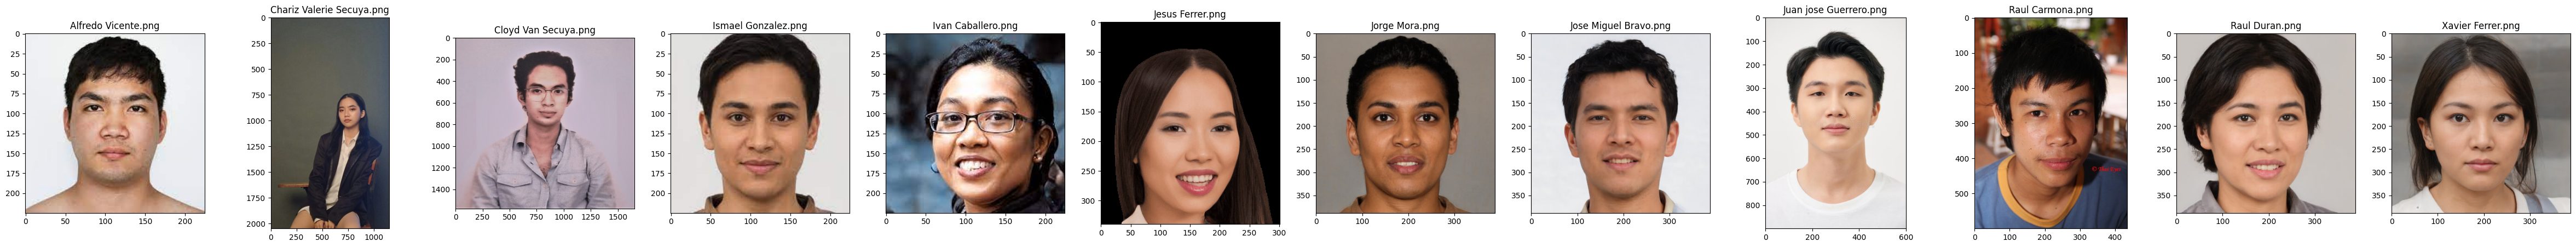

In [54]:
# Count the number of images
num_images = len(save_png_files)
# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(num_images*5,5))

for i, filename in enumerate(save_png_files):
    img_path = os.path.join(directory_path, filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Set the images to RGB channel
    axes[i].imshow(img)
    axes[i].set_title(filename)
plt.show()

# 

### Facial Extraction

Import our MTCNN

In [55]:
from mtcnn.mtcnn import MTCNN

Initializing the face detection feature 

In [56]:
# Initialize the detector 
detector = MTCNN()
num_faces = 0
bounding_area = {}

for face in enumerate(save_png_files):
    img_path = os.path.join(directory_path, filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Detect faces using MTCNN
    results = detector.detect_faces(img)
    num_faces = len(face)
    print("Bounding area: ", results)
    bounding_area[face] = results


1/1 [==============================] - 0s 164ms/step
Bounding area:  [{'box': [94, 81, 189, 261], 'confidence': 0.9955762624740601, 'keypoints': {'left_eye': (145, 181), 'right_eye': (239, 181), 'nose': (198, 238), 'mouth_left': (157, 280), 'mouth_right': (231, 280)}}]
1/1 [==============================] - 0s 32ms/step
Bounding area:  [{'box': [94, 81, 189, 261], 'confidence': 0.9955762624740601, 'keypoints': {'left_eye': (145, 181), 'right_eye': (239, 181), 'nose': (198, 238), 'mouth_left': (157, 280), 'mouth_right': (231, 280)}}]
1/1 [==============================] - 0s 32ms/step
Bounding area:  [{'box': [94, 81, 189, 261], 'confidence': 0.9955762624740601, 'keypoints': {'left_eye': (145, 181), 'right_eye': (239, 181), 'nose': (198, 238), 'mouth_left': (157, 280), 'mouth_right': (231, 280)}}]
1/1 [==============================] - 0s 29ms/step
Bounding area:  [{'box': [94, 81, 189, 261], 'confidence': 0.9955762624740601, 'keypoints': {'left_eye': (145, 181), 'right_eye': (239, 181)

### Initializing the bounding box

Try to get the results of the bounding area

In [57]:
bounding_area

{(0,
  'Alfredo Vicente.png'): [{'box': [94, 81, 189, 261],
   'confidence': 0.9955762624740601,
   'keypoints': {'left_eye': (145, 181),
    'right_eye': (239, 181),
    'nose': (198, 238),
    'mouth_left': (157, 280),
    'mouth_right': (231, 280)}}],
 (1,
  'Chariz Valerie Secuya.png'): [{'box': [94, 81, 189, 261],
   'confidence': 0.9955762624740601,
   'keypoints': {'left_eye': (145, 181),
    'right_eye': (239, 181),
    'nose': (198, 238),
    'mouth_left': (157, 280),
    'mouth_right': (231, 280)}}],
 (2,
  'Cloyd Van Secuya.png'): [{'box': [94, 81, 189, 261],
   'confidence': 0.9955762624740601,
   'keypoints': {'left_eye': (145, 181),
    'right_eye': (239, 181),
    'nose': (198, 238),
    'mouth_left': (157, 280),
    'mouth_right': (231, 280)}}],
 (3,
  'Ismael Gonzalez.png'): [{'box': [94, 81, 189, 261],
   'confidence': 0.9955762624740601,
   'keypoints': {'left_eye': (145, 181),
    'right_eye': (239, 181),
    'nose': (198, 238),
    'mouth_left': (157, 280),
    'mo

Drawing a bounding box around the detected faces

1/1 [==============================] - 0s 32ms/step


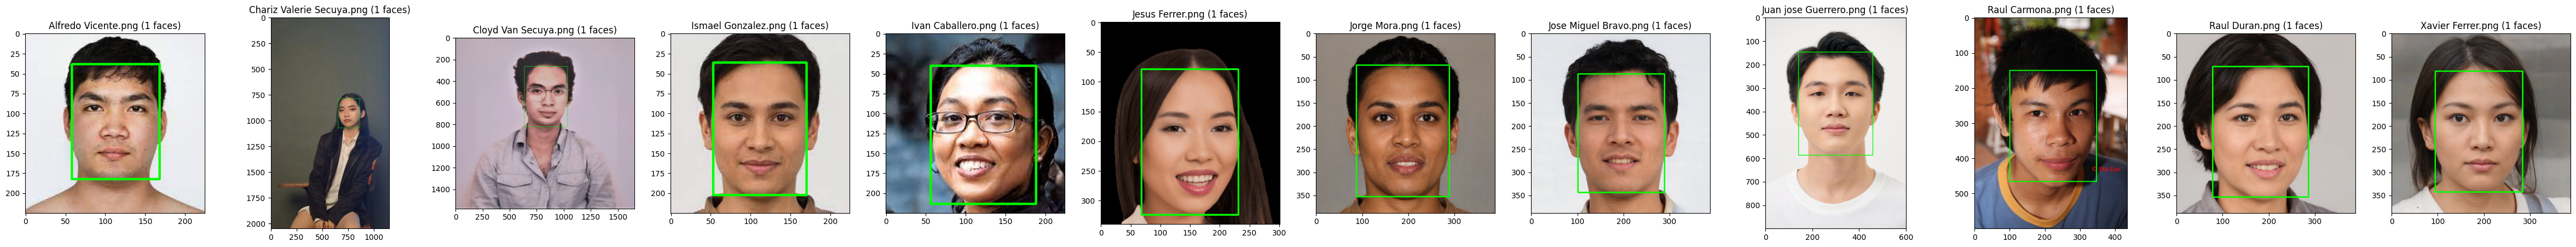

In [58]:
# Loop through the list of PNG files and display each image with detected faces using imshow
num_images = len(save_png_files)
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(num_images*5,5))

for i, filename in enumerate(save_png_files):
    img_path = os.path.join(directory_path, filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    results = detector.detect_faces(img)
    num_faces = len(results)

    faces = []
    # Draw bounding boxes around the detected faces
    for j in range(num_faces):
        x, y, width, height = results[j]['box']
        face = img[y:y+height, x:x+width]
        faces.append(face)
        extracted_faces = np.array(faces)
        cv.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)

    axes[i].imshow(img)
    axes[i].set_title(f"{filename} ({num_faces} faces)")

plt.show()


### Facial Extraction

In [59]:
for images in enumerate(save_png_files):
    img_path = os.path.join(directory_path, filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    results = detector.detect_faces(img)
    num_faces = len(results)

    # Store all detected areas
    detected_areas = {}

    # Then, create a list to store all
    bounding_box_x_y_w_h = [[]]

    for j in range(num_faces):
        x, y, width, height = results[j]['box']
        face = img[y:y+height, x:x+width]
        bounding_box_x_y_w_h.append(face)

for faces in save_png_files:
    # Store the bounding boxes for each face in a dictionary
    face_bounding_boxes = []
    for result in results:
        x, y, width, height = result['box']
        face_bounding_boxes.append((x, y, width, height))
        bounding_box_x_y_w_h.append(face_bounding_boxes)
    detected_areas[faces] = face_bounding_boxes

1/1 [==============================] - 0s 20ms/step


### Cropping face areas

In [60]:
# Initialize cropped_faces_img as an empty list
cropped_faces_img = []

# Loop through the images in save_png_files
for filename in save_png_files:
    img_path = os.path.join(directory_path, filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    results = detector.detect_faces(img)
    areas_to_crop = len(results)

    for j in range(areas_to_crop):
        x, y, width, height = results[j]['box']
        cropped_img = img[y:y+height, x:x+width]
        cropped_img = cv.resize(cropped_img, (160, 160))
        print("Shape: ", cropped_img.shape)

        # Append the cropped image to cropped_faces_img
        cropped_faces_img.append(cropped_img)


1/1 [==============================] - 0s 29ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 28ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 34ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 32ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 34ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 33ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 31ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 32ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 30ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 37ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 39ms/step
Shape:  (160, 160, 3)
1/1 [==============================] - 0s 30ms/step
Shape:  (160, 160, 3)


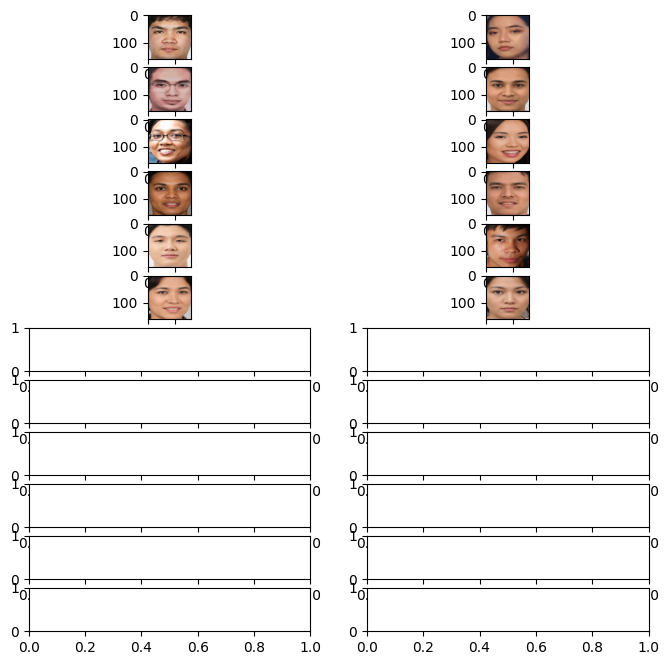

In [61]:
length_cropped_img = len(cropped_faces_img)
fig, axs = plt.subplots(nrows=length_cropped_img, ncols=2, figsize=(8, 8))
for i in range(length_cropped_img):
    row = i // 2
    col = i % 2
    axs[row, col].imshow(cropped_faces_img[i])
plt.show()


### Automating the pre-processing methods

The pre-processing methods include reading the local .png images saved from our database.

Now, we want to do the following:
1. Read through the out directory
2. Convert images to the RGB Channel
3. Detect faces using MTCNN
4. Extract Faces

Define a classs to load and pre-process facial captures

In [62]:
class FACELOADING:
    ''' We need to read through the ../out directory '''
    def __init__(self, directory):
        print("Going into, ", directory)
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        print("Reading images ====> ", filename)
        img = cv.imread(filename)
        print("Converting to RGB Channels")
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        print("Bounding area: ")
        print("\t ===================")
        print("\t x: ", x)
        print("\t y: ", y)
        print("\t width: ", w)
        print("\t height: ", h)
        print("\t ===================")
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        print("Resizing: ", self.target_size)
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, path):
      FACES = []
      print("Loading faces...")
      if not os.path.isfile(path):
          return FACES
      try:
          single_face = self.extract_face(path)
          FACES.append(single_face)
      except Exception as e:
          print("An error has occurred in loading facial capture images")
          pass
      return FACES


    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            print("Loading images from: ", path)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        print("Plotting images....")
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

Face Loading

In [63]:
faceloading = FACELOADING("../out/train/images")
X, Y = faceloading.load_classes()

Going into,  ../out/train/images
Loading images from:  ../out/train/images\Alfredo Vicente.png
Loading faces...
Reading images ====>  ../out/train/images\Alfredo Vicente.png
Converting to RGB Channels
1/1 [==============================] - 0s 171ms/step
Bounding area: 
	 x:  58
	 y:  38
	 width:  110
	 height:  144
Resizing:  (160, 160)
Loading images from:  ../out/train/images\Alfredo_Vicente
Loading faces...
Loading images from:  ../out/train/images\Chariz Valerie Secuya.png
Loading faces...
Reading images ====>  ../out/train/images\Chariz Valerie Secuya.png
Converting to RGB Channels
1/1 [==============================] - 0s 28ms/step
Bounding area: 
	 x:  651
	 y:  787
	 width:  209
	 height:  285
Resizing:  (160, 160)
Loading images from:  ../out/train/images\Chariz_Valerie_Secuya
Loading faces...
Loading images from:  ../out/train/images\Cloyd Van Secuya.png
Loading faces...
Reading images ====>  ../out/train/images\Cloyd Van Secuya.png
Converting to RGB Channels
1/1 [===========

Plotting the extracted faces

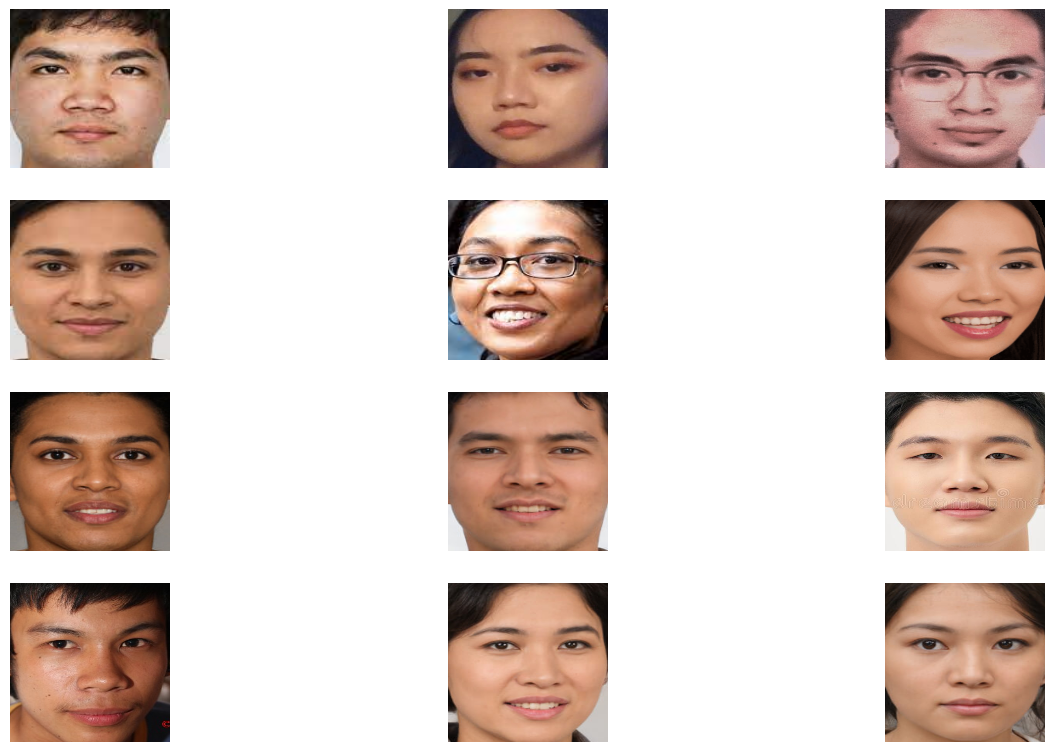

In [64]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

### FaceNet Implementation

Importing FaceNet

In [65]:
from keras_facenet import FaceNet

Creating an object for facenet, and defining method to get embeddings

In [66]:
facenet = FaceNet()
def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= facenet.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

Getting embeddings

In [67]:
EMBEDDED_X = []
# Assign all our cropped images
for cropped_faces_img in X:
    EMBEDDED_X.append(get_embedding(cropped_faces_img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 72ms/step


### Compressing data into .npz 

In [68]:
if((os.path.exists('../out/embed'))):
    np.savez_compressed('../out/embed/faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)
    print("File compressed")
else: 
    os.mkdir('../out/embed')
    print("Embedded directory not found")
    print("Directory created!")
    np.savez_compressed('../out/embed/faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)
    print("File compressed")


File compressed


### SVM Modelling

Now, we can create a data model based on our FaceNet recognition implementation

Import Pre-processing kit

In [69]:
from sklearn.preprocessing import LabelEncoder

Labels Encoding

In [70]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Plot Encodings

Text(0, 0.5, '0')

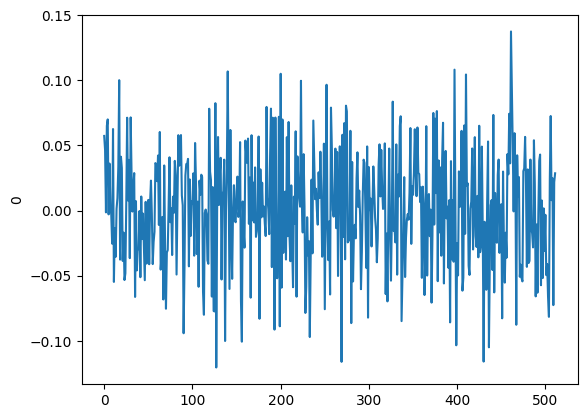

In [71]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

### Splitting the training and testing set

Import train_test_split

In [72]:
from sklearn.model_selection import train_test_split

Assign training and testing variables

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

### Data Modelling

In [74]:
# Training the model
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [75]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

Model Metrics

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, ypreds_train)

1.0

In [77]:
accuracy_score(Y_test,ypreds_test)

0.0

Testing the model

In [78]:
t_im = cv.imread("../out/test/images/Cloyd Van Secuya.png")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 33ms/step


In [79]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 68ms/step


In [80]:
test_im = [test_im]
ypreds = model.predict(test_im)

Saving the model

In [81]:
import pickle
save_path = '../out/model'
if((os.path.exists(save_path))):
    with open('../out/model/svm_model_160x160.pkl','wb') as f:
        print("Model saved to: ", save_path)
        pickle.dump(model,f)
else:
    os.mkdir(save_path)
    with open('../out/model/svm_model_160x160.pkl','wb') as f:
        pickle.dump(model,f)

Model saved to:  ../out/model
